# Data Analysis & Visualization of Netflix Dataset

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df = pd.read_csv('netflix_titles.csv')

In [104]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [91]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [92]:
df.shape

(8807, 12)

In [93]:
# Checking for null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [94]:
# Checking for unique values
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [25]:
# Checking for duplicate values
df.duplicated().sum()

0

In [105]:
df['year_added'] = df['date_added'].str[-4:]

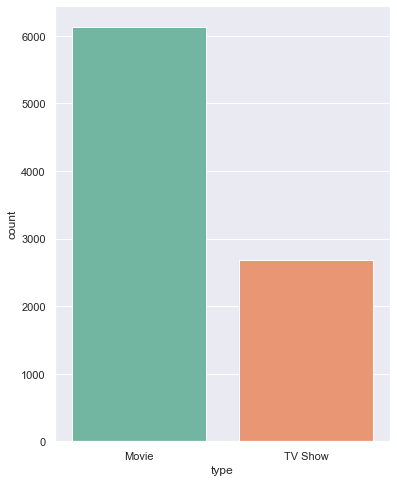

In [36]:
plt.figure(figsize=(6, 8))
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df, palette="Set2")

In [37]:
df_shows=df[df['type']=='TV Show']

In [38]:
df_movies=df[df['type']=='Movie']

Text(0.5, 1.0, 'Movie Ratings')

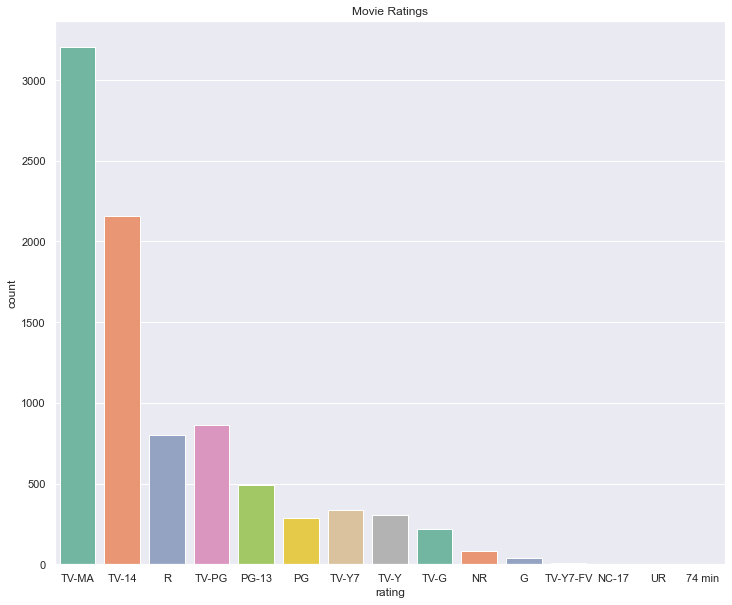

In [45]:
# Plotting count of movie ratings 
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=df, palette="Set2", order=df_movies['rating'].value_counts().index[0:15])
plt.title('Movie Ratings')

Text(0.5, 1.0, 'TV Show Ratings')

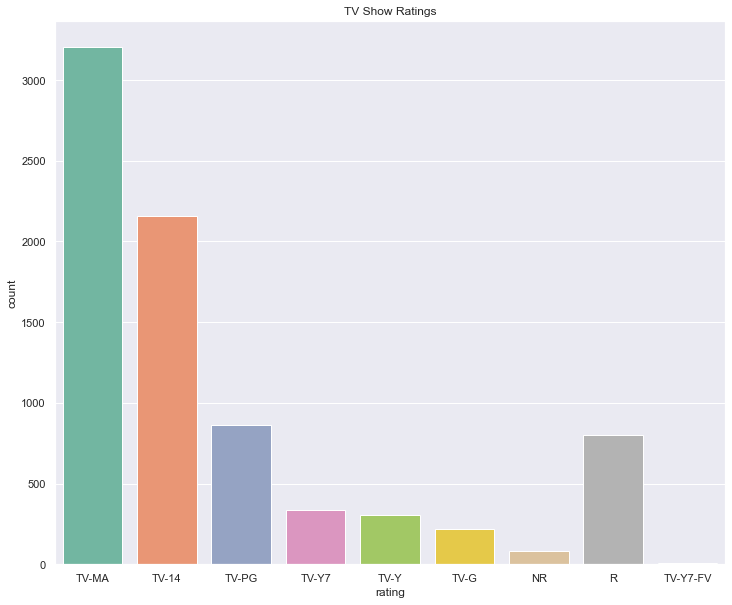

In [44]:
# Plotting count of tv show ratings 
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=df, palette="Set2", order=df_shows['rating'].value_counts().index[0:15])
plt.title('TV Show Ratings')

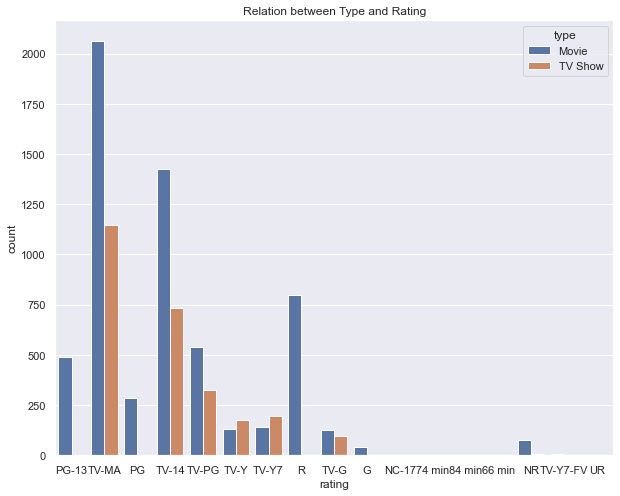

In [46]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=df)
plt.title('Relation between Type and Rating')
plt.show()

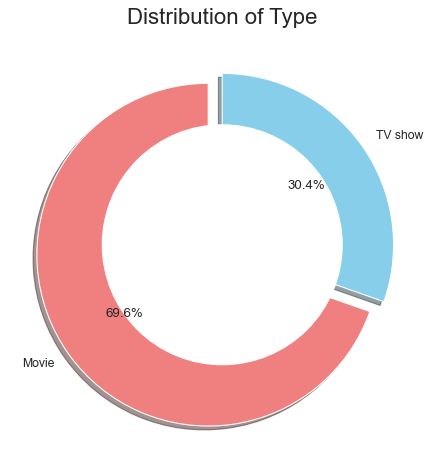

In [48]:
labels = ['Movie', 'TV show']
sizes = df['type'].value_counts()
colors = ['lightcoral', 'skyblue'] 
explode = (0.1, 0)   
plt.figure(figsize=(8, 6), dpi=80)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.rc('font', size=12)
plt.title('Distribution of Type', fontsize=20)
plt.tight_layout()
plt.show()

In [111]:
years = df['release_year'].unique()
years.sort()
years = years[-1:-22:-1]

/var/folders/55/nlx9cksj0qs29nfw4f17sl3r0000gn/T/ipykernel_48064/1890269502.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


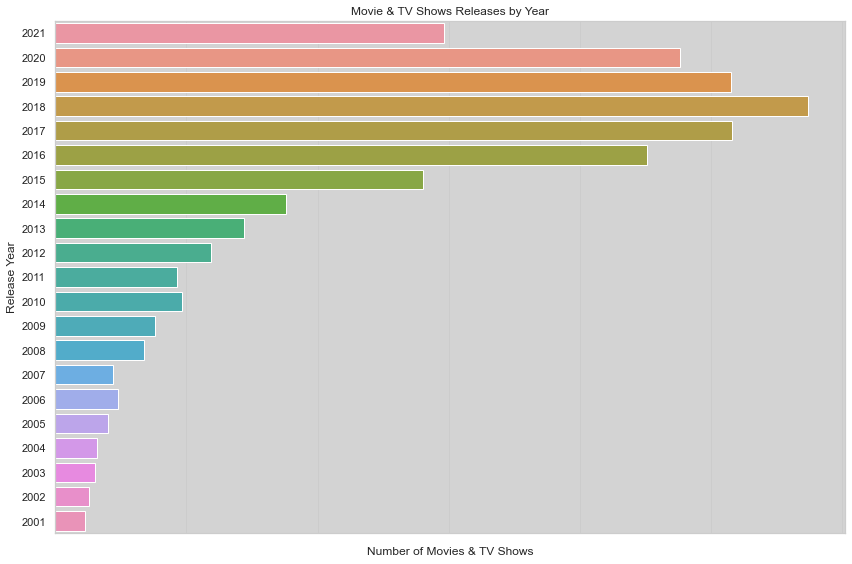

In [112]:
plt.figure(figsize=(12, 8))  
sns.set_style('whitegrid')
sns.set_palette('Blues_d')
ax = sns.countplot(y="release_year", data=df, order=years)  

ax.set(xlabel='Number of Movies & TV Shows', ylabel='Release Year')
ax.set_title('Movie & TV Shows Releases by Year')    
ax.set_xticklabels(ax.get_xticklabels(), rotation=90) 
plt.tight_layout()  
ax.set_facecolor('lightgrey')
plt.show()

/var/folders/55/nlx9cksj0qs29nfw4f17sl3r0000gn/T/ipykernel_48064/3195548752.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


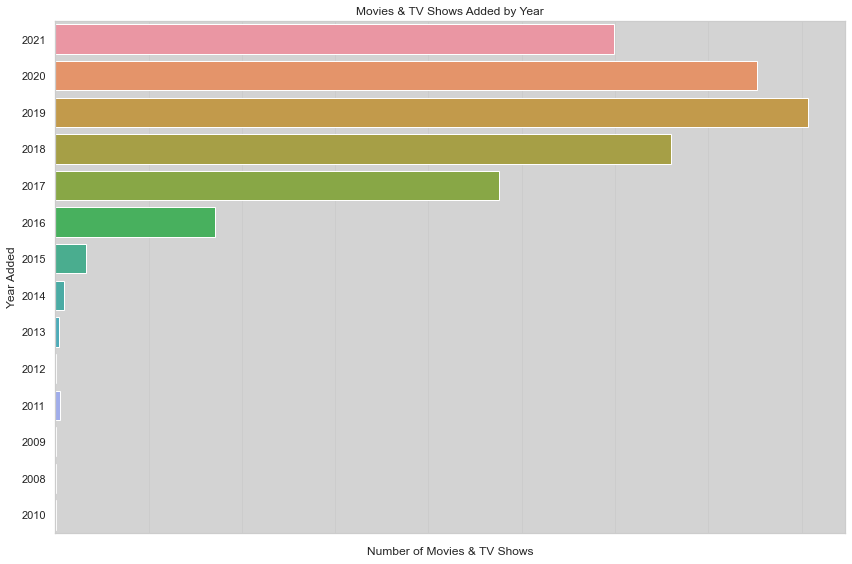

In [113]:
plt.figure(figsize=(12, 8))  
sns.set_style('whitegrid')
sns.set_palette('Blues_d')
ax = sns.countplot(y="year_added", data=df)  

ax.set(xlabel='Number of Movies & TV Shows', ylabel='Year Added')
ax.set_title('Movies & TV Shows Added by Year')    
ax.set_xticklabels(ax.get_xticklabels(), rotation=90) 
plt.tight_layout()  
ax.set_facecolor('lightgrey')
plt.show()

In [118]:
df_movies['duration_mins'] = df_movies['duration'].str.extract('(\d+) min')

/var/folders/55/nlx9cksj0qs29nfw4f17sl3r0000gn/T/ipykernel_48064/3688718209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration_mins'] = df_movies['duration'].str.extract('(\d+) min')


In [123]:
df_movies['duration_mins'] = pd.to_numeric(df_movies['duration_mins'], errors='coerce')

/var/folders/55/nlx9cksj0qs29nfw4f17sl3r0000gn/T/ipykernel_48064/2420999648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration_mins'] = pd.to_numeric(df_movies['duration_mins'], errors='coerce')


99.57718668407311


/var/folders/55/nlx9cksj0qs29nfw4f17sl3r0000gn/T/ipykernel_48064/3476852330.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data=df_movies['duration_mins'], shade=True)


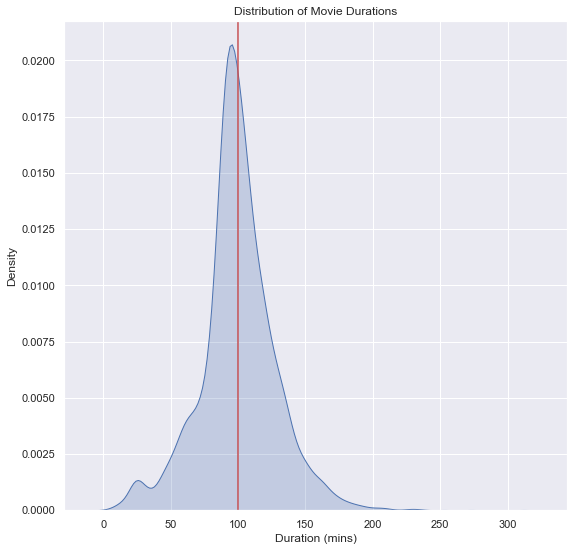

In [126]:
mean_duration = df_movies['duration_mins'].mean()
print(mean_duration)

sns.set(style="darkgrid")
ax = sns.kdeplot(data=df_movies['duration_mins'], shade=True)

ax.axvline(mean_duration, color='r')
ax.set(xlabel='Duration (mins)', title='Distribution of Movie Durations')

plt.show()

In [144]:
# Count the occurrences of each country
country_counts_m = df_movies['country'].value_counts()

# Display the count of TV shows by country
print("Count of Movies by country:")
print(country_counts_m)

Count of Movies by country:
United States                            2058
India                                     893
United Kingdom                            206
Canada                                    122
Spain                                      97
                                         ... 
United Kingdom, Russia, United States       1
Paraguay, Argentina                         1
United Kingdom, Malawi                      1
Austria, Iraq, United States                1
United Arab Emirates, Jordan                1
Name: country, Length: 651, dtype: int64


In [128]:
# Extracting the number of seasons using regular expression
df_shows['num_seasons'] = df_shows['duration'].str.extract('(\d+)').astype(float)

/var/folders/55/nlx9cksj0qs29nfw4f17sl3r0000gn/T/ipykernel_48064/3262611486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shows['num_seasons'] = df_shows['duration'].str.extract('(\d+)').astype(float)


1.764947683109118


/var/folders/55/nlx9cksj0qs29nfw4f17sl3r0000gn/T/ipykernel_48064/1233359296.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data=df_shows['num_seasons'], shade=True)


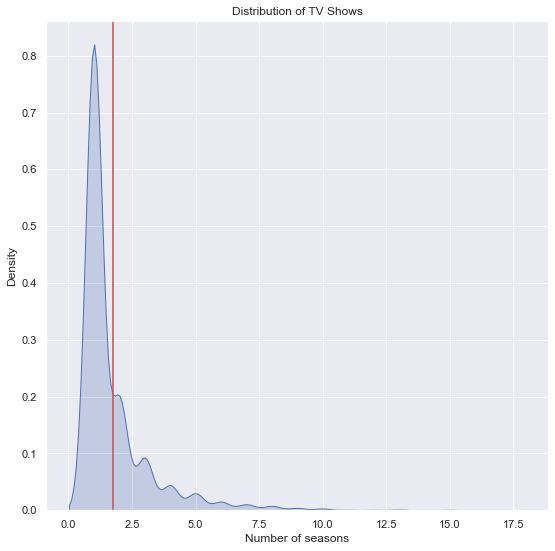

In [130]:
mean_duration = df_shows['num_seasons'].mean()
print(mean_duration)

sns.set(style="darkgrid")
ax = sns.kdeplot(data=df_shows['num_seasons'], shade=True)

ax.axvline(mean_duration, color='r')
ax.set(xlabel='Number of seasons', title='Distribution of TV Shows')

plt.show()

In [135]:
# Count the occurrences of each number of seasons
season_counts = df_shows['num_seasons'].value_counts()

# Display the count of TV shows by season
print("Count of TV shows by season:")
print(season_counts)

Count of TV shows by season:
1.0     1793
2.0      425
3.0      199
4.0       95
5.0       65
6.0       33
7.0       23
8.0       17
9.0        9
10.0       7
13.0       3
15.0       2
12.0       2
11.0       2
17.0       1
Name: num_seasons, dtype: int64


In [136]:
# Finding TV shows with the highest number of seasons
max_seasons_shows = df_shows[df_shows['type'] == 'TV Show'].nlargest(1, 'num_seasons')

# Displaying all TV shows with the highest number of seasons
print("TV Shows with the highest number of seasons:")
for index, row in max_seasons_shows.iterrows():
    print(f"Title: {row['title']}")
    print(f"Number of Seasons: {int(row['num_seasons'])}")
    print(f"Director: {row['director']}")
    print(f"Cast: {row['cast']}")
    # Add more fields as needed
    print("\n---\n")

TV Shows with the highest number of seasons:
Title: Grey's Anatomy
Number of Seasons: 17
Director: nan
Cast: Ellen Pompeo, Sandra Oh, Katherine Heigl, Justin Chambers, Patrick Dempsey, Chandra Wilson, T.R. Knight, James Pickens Jr., Isaiah Washington, Sara Ramirez, Eric Dane, Chyler Leigh, Kate Walsh, Kevin McKidd, Jessica Capshaw

---



In [145]:
# Count the occurrences of each country
country_counts_s = df_shows['country'].value_counts()

# Display the count of TV shows by country
print("Count of TV shows by country:")
print(country_counts_s)

Count of TV shows by country:
United States                                    760
United Kingdom                                   213
Japan                                            169
South Korea                                      158
India                                             79
                                                ... 
Belarus                                            1
United Kingdom, Australia                          1
France, Australia, Germany                         1
Australia, New Zealand, United States              1
United States, France, South Korea, Indonesia      1
Name: country, Length: 196, dtype: int64
